In [1]:
import CLARA as c
import pandas as pd
import numpy as np

In [2]:
df_full = pd.concat(pd.read_excel('repetitors_1.xlsx', sheet_name=None), ignore_index=True)
df = df_full.drop(['Column1', 'author', 'date', 'id', 'reply', 'text', 'tutorlink', 'tutorname'], axis=1)
marks = {
    'лучше не бывает!' : 10,
    'отлично' : 9,
    'почти отлично' : 8,
    'вполне хорошо' : 7,
    'хорошо' : 6,
    'почти хорошо' : 5,
    'более-менее' : 4,
    'так себе...' : 3,
    'плохо' : 2,
    'ужасно' : 1
}
subjects = {}
val = 1
for subject in df['discipline'].unique():
    subjects[subject] = val
    val += 1
df = df.replace({"mark": marks}).dropna()
df = df.replace({"discipline": subjects})

In [3]:
best_choices = []
results = {}
arr = df.to_numpy()
best_choices, results = c.clara(5, arr, 10, c.euclid, 1000)


In [4]:
def plot_parser(results, size) :
    label = np.zeros(size)
    idx = 1
    for key in results :
        for i in range(len(results[key])) :
            label[results[key][i]] = key
        idx += 1
    return label

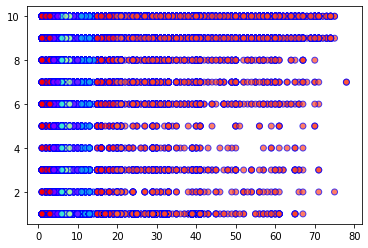

[61, 90, 4, 25, 8, 102, 40, 98, 51, 93]


In [5]:
from matplotlib import pyplot as plt
label = plot_parser(results, len(df))
X = df.values
plt.scatter(X[:,0], X[:,1], c=label, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.show()
print(best_choices)

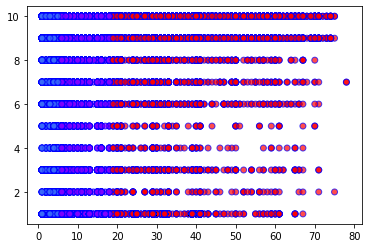

[19, 177, 41]

In [6]:
best_choices, results = c.clara(5, arr, 3, c.euclid, 1000000)
label = plot_parser(results, len(df))
X = df.values
plt.scatter(X[:,0], X[:,1], c=label, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.show()
best_choices

In [7]:
#file_res = "results.csv"
#df["label"] = label
#df.to_csv(file_res)